# Assignment 3

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
import keras_tuner as kt
from keras_tuner import HyperParameters

---
### Step 1: Data ingestion

You'll use the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)  from 1985 Ward's Automotive Yearbook that is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets).

This dataset has been pre-downloaded and uploaded to bCourses alongside this notebook for your convenience.

In [ ]:
car_data_init = pd.read_csv("./data/Automobile_data/automobile_data.txt")

# Display top five rows
print('Shape of data:', car_data_init.shape)
car_data_init.head()

Shape of data: (205, 26)


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


---
### Step 2: Data preprocessing

This step is essential for preparing the data in a format that is suitable for ML algorithms. It helps ensure data quality and improvements in model performance.

### <span style="color:chocolate">Exercise 1:</span> Column selection (5 points)

To keep things simple, you will:

1. Retain only the following columns: ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']. Name the new dataframe *car_data*.
2. Display the data type of each column;
3. Convert the data type of each columns to numeric. Coerce missing values to NaN. Hint: use <span style="color:chocolate">pd.to_numeric()</span> method;
4. Display the data type of each column after the transformation performed at point 3.


In [ ]:
#create separate dataframe for specified columns
car_data = car_data_init[['horsepower','peak-rpm','city-mpg','highway-mpg','price']]
#print out data type of columns
print('Dtype of horsepower: ', car_data['horsepower'].dtype)
print('Dtype of peak-rpm: ', car_data['peak-rpm'].dtype)
print('Dtype of city-mpg: ', car_data['city-mpg'].dtype)
print('Dtype of highway-mpg: ', car_data['highway-mpg'].dtype)
print('Dtype of price: ', car_data['price'].dtype)

#convert to numeric data type
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors = 'coerce')
car_data['peak-rpm'] = pd.to_numeric(car_data['peak-rpm'], errors = 'coerce')
car_data['city-mpg'] = pd.to_numeric(car_data['city-mpg'], errors = 'coerce')
car_data['highway-mpg'] = pd.to_numeric(car_data['highway-mpg'], errors = 'coerce')
car_data['price'] = pd.to_numeric(car_data['price'], errors = 'coerce')
#print out data type of columns
print('Dtype of horsepower: ', car_data['horsepower'].dtype)
print('Dtype of peak-rpm: ', car_data['peak-rpm'].dtype)
print('Dtype of city-mpg: ', car_data['city-mpg'].dtype)
print('Dtype of highway-mpg: ', car_data['highway-mpg'].dtype)
print('Dtype of price: ', car_data['price'].dtype)

Dtype of horsepower:  float64
Dtype of peak-rpm:  float64
Dtype of city-mpg:  int64
Dtype of highway-mpg:  int64
Dtype of price:  float64
Dtype of horsepower:  float64
Dtype of peak-rpm:  float64
Dtype of city-mpg:  int64
Dtype of highway-mpg:  int64
Dtype of price:  float64


/tmp/ipython-input-2109902138.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors = 'coerce')
/tmp/ipython-input-2109902138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['peak-rpm'] = pd.to_numeric(car_data['peak-rpm'], errors = 'coerce')
/tmp/ipython-input-2109902138.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



### <span style="color:chocolate">Exercise 2:</span> Example (row) selection (5 points)

To keep things simple again, you will:

1. Print the shape of the car_data;

2. Remove examples (rows) that have missing value(s). Note that in doing so, you will overwrite the car_data dataset. You should end up with 199 examples after this cleaning.

3. Print the shape of the car_data again.

It's important to acknowledge that there are multiple approaches to handling missing features, and simply discarding examples with any missing feature, though straightforward, may not be the most optimal solution. However, for the sake of simplicity, you will implement this strategy in this assignment.

In [ ]:
#print shape of car_data
print("Shape of car_data: ", car_data.shape)

#remove rows with missing values
car_data = car_data.dropna()

#print shape of car_data again
print("Shape of car_data: ", car_data.shape)

Shape of car_data:  (205, 5)
Shape of car_data:  (199, 5)


### <span style="color:chocolate">Exercise 3:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. Note that the original data (above) appears sorted by *make* in alphabetic order.

Using NumPy and Pandas methods:

1. Create a list of indices corresponding to the rows in the car_data dataset. Call this list *indices*. Print this list;

2. Shuffle *indices* using the <span style="color:chocolate">np.random.permutation()</span> method. Call the resulting array *shuffled_indices*. Print this array;
    
3. Use the method <span style="color:chocolate">dataframe.reindex()</span> to change the ordering of the car_data dataset based on the order in the *shuffled_indices* array. Note that in doing so, you will overwrite the original dataset. Print the top 5 rows.

In [ ]:
np.random.seed(0)
car_data_reset = car_data.reset_index(drop=True)
indices = car_data_reset.index.to_numpy()

# creating indeces list
indeces = car_data.index.to_numpy()
#shuffle indices and print
shuffled_indeces = np.random.permutation(indeces)
print("Shuffled Indeces: ", shuffled_indeces)
#change ordering of car_data based on shuffled indeces
car_data = car_data.reindex(shuffled_indeces)
print("First 5 Rows:")
print(car_data.head())

Shuffled Indeces:  [ 19 175 109  95 182 189   5 145  13 166  64 127 170 151  83   7  34 135
  38  77 165 150  48 164  63 125 184 190 100  47  17  58  86 113  23 194
 141   4 143 199 159  69  27 137 152  66   8  78 101 172  74 202  89  99
 155  25  31 116  41  59 136 188 186  20 158 142  57 168  54 115 144  92
  93 126 149 187 111  15  28 104 121  49 200 110  65   2  62 179 132  46
  11 192  76 197 183 173 128  96 114 163 196  53   0  97 112  98  67 147
  42  72  52  51  88  14 156  24 191 140  21  16  81 107  55 103  79   3
 119 169 203   6  71  87 124 160 176 161  94 177  12 122 105  36  60  68
   1 123 167  43 108 138 204  18  39 139  56 162 134  35  29 117 157  32
 185 133 181  33 148 174 153  30 102  85  82 118 154 201  75  80  26 171
  84 193 180 195  40  61 146  91  73  90  37  22  10 106  70 198 120  50
 178]
First 5 Rows:
     horsepower  peak-rpm  city-mpg  highway-mpg    price
19         70.0    5400.0        38           43   6295.0
175        92.0    4200.0        27       

### <span style="color:chocolate">Exercise 4:</span> Define outcome and features (5 points)

Create two dataframes as follows:

1. The first dataframe contains our outcome of interest: ['price']. Note, this is what we are aiming to predict. Name this dataframe Y. Print shape of Y.
2. The second dataframe contains our features of interest: ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']. Name this dataframe X. Print shape of X.


In [ ]:
#create and print shape of first df
Y = car_data[['price']]
print("Shape of Y: ", Y.shape)
#create and print shape of second df
X = car_data[['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']]
print("Shape of X: ", X.shape)


Shape of Y:  (199, 1)
Shape of X:  (199, 4)


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Partition the (X, Y) data into training, validation, and test sets using a splitting rule of [60%, 20%, 20%], with a random state set to 1234. Name the resulting dataframes as follows: X_train, X_val, X_test, Y_train, Y_val, Y_test. Hint: To create these three partitions you will utilize the train_test_split() method twice (all the other arguments of the method are set to default values.). You should obtain [119, 40, 40] examples for training, validation, and test, respectively.
2. Print the shape of each dataframe.

Note: The validation set is crucial for evaluating different hyperparameter configurations and selecting those that yield optimal model performance. This approach avoids utilizing the test dataset during model training, as it is assumed to be "unknown" at that stage.

In [ ]:
#partition (X,Y) into train, val, and test
X_main, X_test, Y_main, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=1234)
X_train, X_val, Y_train, Y_val = train_test_split(X_main, Y_main, test_size = 0.25, random_state=1234)
#print shape of each df
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_test: ", Y_test.shape)
print("Shape of Y_val: ", Y_val.shape)

Shape of X_train:  (119, 4)
Shape of X_test:  (40, 4)
Shape of X_val:  (40, 4)
Shape of Y_train:  (119, 1)
Shape of Y_test:  (40, 1)
Shape of Y_val:  (40, 1)


### <span style="color:chocolate">Exercise 6:</span> Data standardization (10 points)

With this concept in mind, complete the following tasks:

1. Output the quantile values (0.25, 0.5, 0.75, 0.95) for all features in the X_train dataset. Are these values uniformly scaled across features?

2. Standardize all features in X_train, X_val, and X_test. Label the resulting dataframes as X_train_std, X_val_std, and X_test_std, respectively. Hint: standardize the validation and test data using the mean and standard deviation computed from the training data. Why?

3. Similar to point 2. but now standardize the outcome variable. Label the resulting dataframes as Y_train_std, Y_val_std, and Y_test_std.

In [ ]:
#find and output quantile values in X_train
X_train_fourth = X_train.quantile(0.25)
X_train_half = X_train.quantile(0.5)
X_train_threefourth = X_train.quantile(0.75)
X_train_ninetyfive = X_train.quantile(0.95)

print("X_train 0.25 Quantile: ")
print(X_train_fourth)
print("X_train 0.5 Quantile: ")
print(X_train_half)
print("X_train 0.75 Quantile: ")
print(X_train_threefourth)
print("X_train 0.95 Quantile: ")
print(X_train_ninetyfive)

#standardize all features in X_train, X_val, and X_test
X_train_std = (X_train - X_train.mean())/X_train.std()
X_val_std = (X_val - X_train.mean())/X_train.std()
X_test_std = (X_test - X_train.mean())/X_train.std()
print("We use the training data mean and stdev because the training data is the only seen data. The test and validation datasets are not supposed to be peeked at.")

#standardize all features in Y_train, Y_val, Y_test
Y_train_std = (Y_train - Y_train.mean())/Y_train.std()
Y_val_std = (Y_val - Y_train.mean())/Y_train.std()
Y_test_std = (Y_test - Y_train.mean())/Y_train.std()

X_train 0.25 Quantile: 
horsepower       69.0
peak-rpm       4800.0
city-mpg         21.0
highway-mpg      25.0
Name: 0.25, dtype: float64
X_train 0.5 Quantile: 
horsepower       90.0
peak-rpm       5100.0
city-mpg         25.0
highway-mpg      30.0
Name: 0.5, dtype: float64
X_train 0.75 Quantile: 
horsepower      116.0
peak-rpm       5400.0
city-mpg         31.0
highway-mpg      37.0
Name: 0.75, dtype: float64
X_train 0.95 Quantile: 
horsepower      176.6
peak-rpm       5810.0
city-mpg         37.0
highway-mpg      42.1
Name: 0.95, dtype: float64
We use the training data mean and stdev because the training data is the only seen data. The test and validation datasets are not supposed to be peeked at.


---
### Step 3: Exploratory data analysis (EDA)

EDA plays a very important role in ML. The goal here is to develop a good understanding of our training dataset, identify any data quality issues, understand patterns and relationships, which in turn, aids in subsequent modeling and interpretations.

### <span style="color:chocolate">Exercise 7:</span> Scatterplot matrix (10 points)

In this exercise you will use some simple yet useful techniques to visualize the distribution of the data.

Let's start with:

1. A scatterplot matrix to visualize the pair-wise correlations between different features and outcome in the (X_train_std, Y_train_std) data. You will use the <span style="color:chocolate">sns.pairplot()</span> method from the seaborn library imported at the top of the notebook;
2. Is any of the variables in the data normally distributed? Is it necessary for the explanatory or target variable to be normally distributed in order to train a ML model?

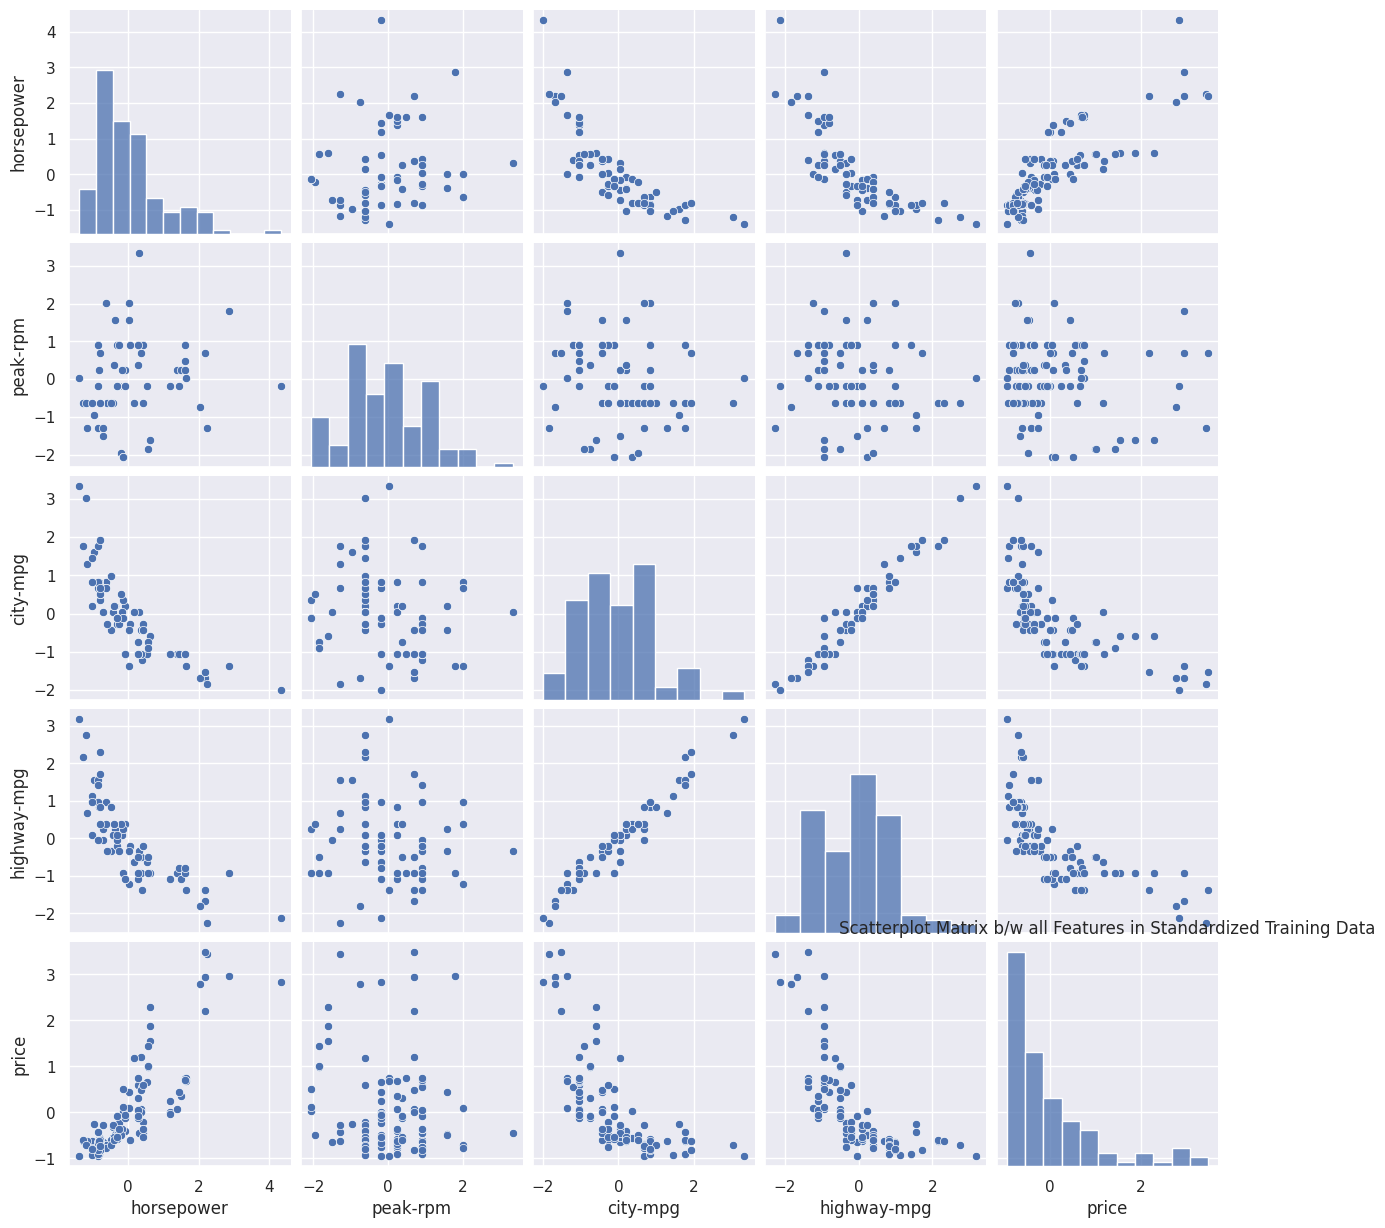

None of the data is normally distributed. It is not necessary for either the explanatory or target variables to be normally distributed to train a ML model.
This is because most neural networks do not assume normality in either input or outputs.


In [ ]:
#create dataframe to plot
data_plot = pd.concat([X_train_std, Y_train_std], axis = 1)
sns.pairplot(data_plot)
plt.title("Scatterplot Matrix b/w all Features in Standardized Training Data")
plt.show()

print("None of the data is normally distributed. It is not necessary for either the explanatory or target variables to be normally distributed to train a ML model.")
print("This is because most neural networks do not assume normality in either input or outputs.")

### <span style="color:chocolate">Exercise 8:</span> Correlation matrix (10 points)

In this exercise you will:

1. Plot a correlation matrix in the form of a heatmap to visualize the linear relationships between different features and outcome in the (X_train_std, Y_train_std) data. Hint: this example here is very useful: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    
2. Answer the following questions:
 - Which two features are likely to be most redundant?
 - Which feature is likely to be least useful for predicting price?

From the correlation matrix, we see that city mpg and highway mpg appear to be the most redundant.
Peak rpm is the least useful feature for predicting price.


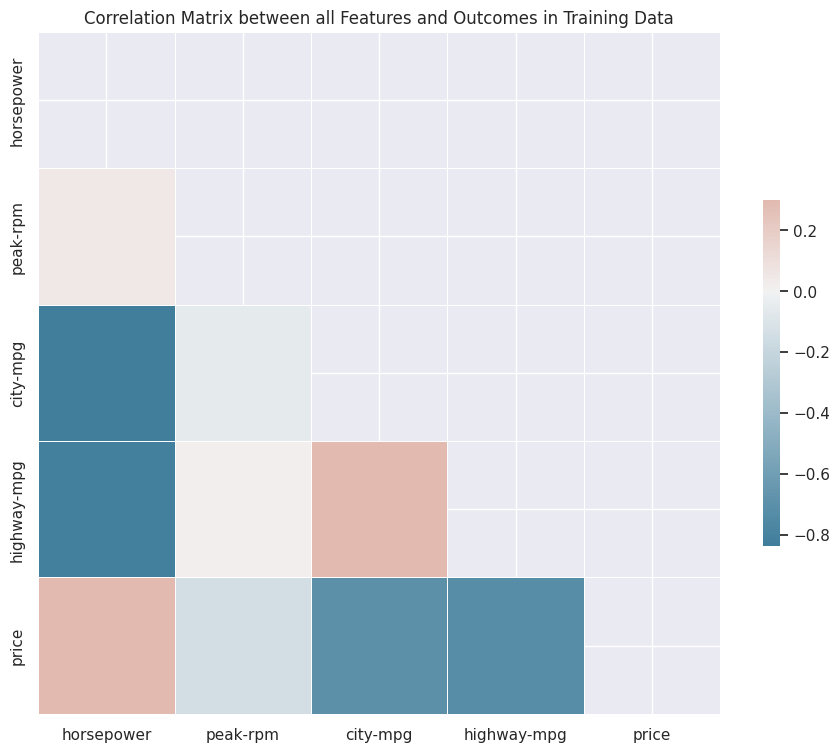

In [ ]:
# Compute the correlation matrix
corr = data_plot.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix between all Features and Outcomes in Training Data")
print("From the correlation matrix, we see that city mpg and highway mpg appear to be the most redundant.")
print("Peak rpm is the least useful feature for predicting price.")

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 9:</span> Baseline model (5 points)

Let's start by evaluating a baseline model. Precisely, you'll use the average price of cars in the training set as our baseline model -- that is, the baseline always predicts the average price regardless of the input.

1. Implement this baseline using the Y_train_std data and print the average price. Note: You can revert the price variable to the original scale for interpretation purposes.

In [ ]:
ytrain_price_mean = Y_train["price"].mean()
ytrain_price_std = Y_train["price"].std()

baseline_pred = (Y_train_std["price"].mean() * ytrain_price_std) + ytrain_price_mean

print("Baseline prediction (original scale):", baseline_pred)

Baseline prediction (original scale): 12889.008403361344


### <span style="color:chocolate">Exercise 10:</span> Improvement over Baseline with TensorFlow (10 points)

Let's train a linear regression model much like we did in the previous assignment, but this time using TensorFlow.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: refer to the course webpage in <span style="color:chocolate">bCourses/Modules/Module Demos/03 Features.ipynb</span> for an example.
2. Build and compile a model using the build_model() function and the (X_train_std, Y_train_std) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_std, Y_train_std) data. Set num_epochs = 5. Pass the (X_val_std, Y_val_std) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method.
3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns.

More notes on point 1: the idea is to build a *computational graph* for linear regression, and then send data through it. There are many ways to build graphs, but [TenforFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) is recommended.

In [ ]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # linear regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=(num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
      bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use GD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. This finalizes the graph for training.
  # We specify the MSE loss and the optimizer above
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
  return model

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 5.5000 - mae: 1.8549 - val_loss: 4.8144 - val_mae: 1.6576
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 5.4840 - mae: 1.8522 - val_loss: 4.8031 - val_mae: 1.6565
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 5.4681 - mae: 1.8494 - val_loss: 4.7919 - val_mae: 1.6555
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 5.4523 - mae: 1.8467 - val_loss: 4.7808 - val_mae: 1.6544
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 5.4365 - mae: 1.8440 - val_loss: 4.7696 - val_mae: 1.6534
(119, 1)


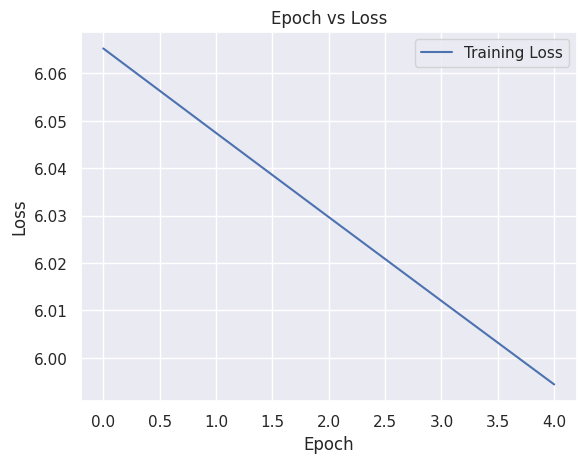

In [ ]:
tf.random.set_seed(0)
# 2. Build and compile model
model_tf = build_model(4, learning_rate=0.0001)
# 3. Fit the model
history = model_tf.fit(X_train_std, Y_train_std, validation_data=(X_val_std, Y_val_std), epochs = 5)
print(Y_train_std.shape)
plt.plot(history.history["loss"], label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()


---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 11:</span> Hyperparameter tuning (10 points)

1. Fine-tune the **learning rate** and **number of epochs** hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for these hyperparameters. Hint: you can manually test different hyperparameter values or you can use the [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). If you decide to work with the Keras Tuner, define a new model building function named <span style="color:chocolate">build_model_tuner()</span>.

After identifying your preferred model configuration, print the following information:

2. The learned parameters of the tuned model (this should include the bias term). Hint: use  <span style="color:chocolate">[model_name].layers[0].get_weights()</span>.
3. The loss at the final epoch on both the training and validation datasets;
4. The difference between the last-epoch loss observed on the training and validation datasets.


Please note that we will consider 'optimal model configuration' any last-epoch training loss that is below 0.31 and any last epoch validation loss that is below 0.48. Hint: do not specify the batch_size argument in the fit() function (it defaults to 32).

In [ ]:
tf.random.set_seed(0)
model_tf = build_model(4, learning_rate=0.005)
history = model_tf.fit(X_train_std, Y_train_std, validation_data=(X_val_std, Y_val_std), epochs = 150)

print("Learned Parameters (Including Bias as Final Term):")
print(model_tf.layers[0].get_weights())

print("Loss at Final Epoch on Training Dataset:" , 0.2666)
print("Loss at Final Epoch on Validation Dataset: ", 0.4215)

print("Difference Between Last-Epoch Loss b/w Training and Validation: ", 0.1549)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 5.3426 - mae: 1.8313 - val_loss: 4.3069 - val_mae: 1.6073
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.6320 - mae: 1.7112 - val_loss: 3.8798 - val_mae: 1.5594
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.0421 - mae: 1.6073 - val_loss: 3.5251 - val_mae: 1.5187
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5502 - mae: 1.5140 - val_loss: 3.2279 - val_mae: 1.4788
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1381 - mae: 1.4333 - val_loss: 2.9763 - val_mae: 1.4396
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7911 - mae: 1.3660 - val_loss: 2.7612 - val_mae: 1.4013
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4973 - mae: 1.3037 - val_loss: 2.5753 - val_mae: 1.3649
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2474 - mae: 1.2464 - val_loss: 2.4130 - val_mae: 1.3320
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.0335 - mae: 1.1942 - val

---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized (tuned) model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 12:</span> Computing MSE (10 points)

1. Calculate the MSE on both (X_train_std, Y_train_std) and (X_test_std, Y_test_std) datasets. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your observations. Hint: compare train vs. test MSE.

4. Generate a plot to visualize the accuracy of the predictions. Plot the actual (observed) Y_test values on the x-axis and the predicted Y_test values on the y-axis. Additionally, include a 45-degree line in the plot for reference. Ensure that the plot contains appropriate axis labels and a title. Provide commentary on the model's fit based on this visualization. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2619 - mae: 0.3697 
Training Data MSE:  0.27944818139076233
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2791 - mae: 0.3894
Test Data MSE:  0.27097493410110474
The model demonstrates strong generalization capabilities because the training data MSE is close in value to the test data MSE.
They are also both small in value. The difference is:  0.008473247289657593
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The points appear to be gathered around the 45 degree line, making the average slope close to 1.
This means the the ratio of the predictions to actual data is roughly 1, and they are close to each other.
Thus, this model is a good fit.


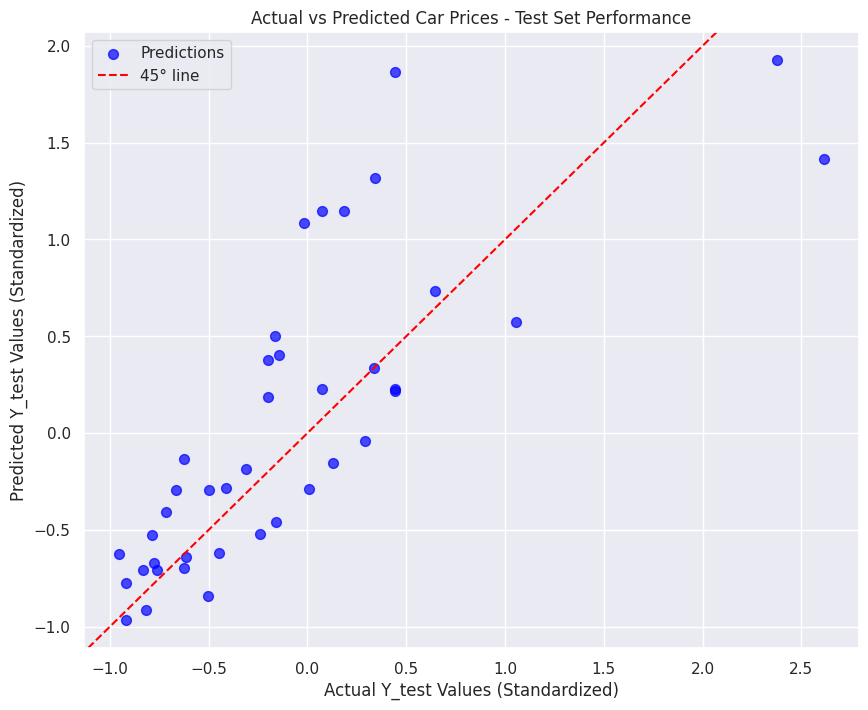

In [ ]:
#calculate MSE on training and test datasets
trainloss = model_tf.evaluate(X_train_std, Y_train_std)
print("Training Data MSE: ", trainloss[0])
testloss = model_tf.evaluate(X_test_std, Y_test_std)
print("Test Data MSE: ", testloss[0])

print("The model demonstrates strong generalization capabilities because the training data MSE is close in value to the test data MSE.")
print("They are also both small in value. The difference is: ", abs(trainloss[0]-testloss[0]))

Y_predict = model_tf.predict(X_test_std)
plt.figure(figsize=(10, 8))
plt.scatter(Y_test_std, Y_predict, alpha=0.7, color='blue', s=50, label='Predictions')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='45° line')
plt.xlabel('Actual Y_test Values (Standardized)')
plt.ylabel('Predicted Y_test Values (Standardized)')
plt.title('Actual vs Predicted Car Prices - Test Set Performance')
plt.legend()

print("The points appear to be gathered around the 45 degree line, making the average slope close to 1.")
print("This means the the ratio of the predictions to actual data is roughly 1, and they are close to each other.")
print("Thus, this model is a good fit.")